In [1]:
from plate_detection.blocks import YoloV3
import tensorflow as tf
from plate_detection.yolo.const import YOLO_LAYERS, NUM_CLASSES
from plate_detection.yolo.utils import load_yolo_weights, load_image_as_tf, get_bboxes, get_original_bbox

2025-01-29 21:01:57.463111: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738180917.604790 2092843 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738180917.646112 2092843 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-29 21:01:58.029332: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
model = YoloV3(num_classes=NUM_CLASSES)()
model.summary()

2025-01-29 21:02:04.795560: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "YoloV3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)  │ (None, 416, 416,  │          0 │ -                 │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ DarkNet_Conv2D_0    │ (None, 416, 416,  │        992 │ input[0][0]       │
│ (CNNBlock)          │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ DarkNet_Conv2D_1    │ (None, 208, 208,  │     18,688 │ DarkNet_Conv2D_0… │
│ (CNNBlock)          │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ DarkNet_Residual_1  │ (None, 208, 208,  │     20,864 │ DarkNet_Conv2D_1… │
│ (ResidualBlock)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ DarkNet_Conv2D_2    │ (None, 104, 104,  │     74,240 │ DarkNet_Residual… │
│ (CNNBlock)          │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ DarkNet_Residual_2  │ (None, 104, 104,  │    165,376 │ DarkNet_Conv2D_2… │
│ (ResidualBlock)     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ DarkNet_Conv2D_3    │ (None, 52, 52,    │    295,936 │ DarkNet_Residual… │
│ (CNNBlock)          │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ DarkNet_Residual_s… │ (None, 52, 52,    │  2,633,728 │ DarkNet_Conv2D_3… │
│ (ResidualBlock)     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ DarkNet_Conv2D_4    │ (None, 26, 26,    │  1,181,696 │ DarkNet_Residual… │
│ (CNNBlock)          │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ DarkNet_Residual_s… │ (None, 26, 26,    │ 10,510,336 │ DarkNet_Conv2D_4… │
│ (ResidualBlock)     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ DarkNet_Conv2D_5    │ (None, 13, 13,    │  4,722,688 │ DarkNet_Residual… │
│ (CNNBlock)          │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ DarkNet_Residual_3  │ (None, 13, 13,    │ 20,996,096 │ DarkNet_Conv2D_5… │
│ (ResidualBlock)     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Yolo_Conv2D_0       │ (None, 13, 13,    │    526,336 │ DarkNet_Residual… │
│ (CNNBlock)          │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Yolo_Conv2D_1       │ (None, 13, 13,    │  4,722,688 │ Yolo_Conv2D_0[0]… │
│ (CNNBlock)          │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Yolo_Residual_1     │ (None, 13, 13,    │  5,249,024 │ Yolo_Conv2D_1[0]… │
│ (ResidualBlock)     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Yolo_Conv2D_2       │ (None, 13, 13,    │    526,336 │ Yolo_Residual_1[… │
│ (CNNBlock)          │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Yolo_Conv2D_3       │ (None, 13, 13,    │    132,096 │ Yolo_Conv2D_2[0]

 Total params: 61,576,342 (234.90 MB)

 Trainable params: 61,523,734 (234.69 MB)

 Non-trainable params: 52,608 (205.50 KB)

# Inference

In [3]:
# Loading AexeyAB fine-tuned weights to our model
#load_yolo_weights("../.weights/yolov3-custom_final.weights", model, YOLO_LAYERS)

# Load out model weights
model.load_weights("/home/malik/projects/license-plate-recognition/.weights/checkpoint6.weights.h5")

# load image 
image_name = "../.dataset/polish/train/103fecb875c8488b9ad59359e97bc08c.jpg"
scale, image = load_image_as_tf(image_name)

# made predictions on the image
out = model(image)

# convert the per cell detection into bounding boxes
detections = get_bboxes(out)

(10647, 6)


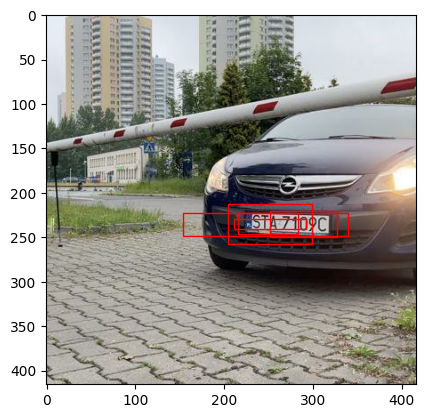

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# load the original image to persist the the original image shape
original_image = tf.image.decode_image(open(image_name, 'rb').read(), channels=3)

fig, ax = plt.subplots()

# Display the image
ax.imshow(original_image)

boxes, _class, conf = detections
for box in boxes:
    # Get the bounding box coordinates
    
    x1, y1, x2, y2 = get_original_bbox(scale, box)

    rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')
    # Add the rectangle to the Axes
    ax.add_patch(rect)

# # Show the plot with the rectangle
plt.show()

# Training

We performed training of our model using google colab. 
https://colab.research.google.com/drive/1Mq5MwiIRKGp8b-pJYcMjLN8NO7OntpH-?usp=sharing